<a href="https://colab.research.google.com/github/Mathildeholst/Git_training/blob/main/F4-fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


**Training the same model on MNIST data with noise channels or all-zero channels**

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.6897 - loss: 1.0947 - val_accuracy: 0.8939 - val_loss: 0.3227
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9144 - loss: 0.2704 - val_accuracy: 0.9470 - val_loss: 0.1757
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9477 - loss: 0.1716 - val_accuracy: 0.9577 - val_loss: 0.1410
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.9624 - loss: 0.1200 - val_accuracy: 0.9538 - val_loss: 0.1540
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9723 - loss: 0.0871 - val_accuracy: 0.9652 - val_loss: 0.1206
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9805 - loss: 0.0619 - val_accuracy: 0.9609 - val_loss: 0.1382
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9859 - loss: 0.0454 - val_accuracy: 0.9675 - val_loss: 0.1169
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.9896 - loss: 0.0315 - val_ac

**Plotting a validation accuracy comparison**

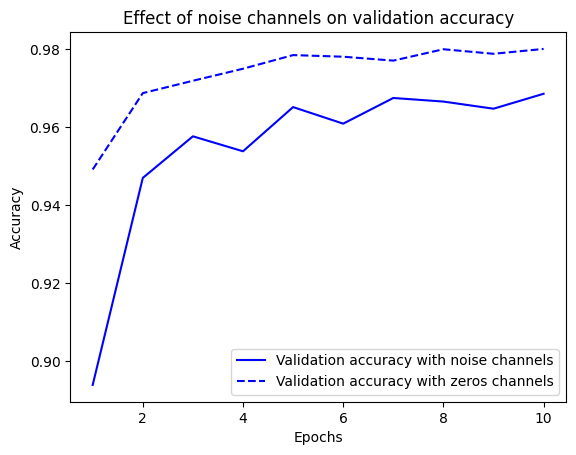

In [3]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

SE FORKLARING AF PLOT I NOTER

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [4]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.4438 - loss: 3763.4841 - val_accuracy: 0.1985 - val_loss: 2.2069
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.1788 - loss: 2.6216 - val_accuracy: 0.1924 - val_loss: 2.3093
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.1602 - loss: 2.4556 - val_accuracy: 0.2088 - val_loss: 2.3130
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.1935 - loss: 2.3470 - val_accuracy: 0.1663 - val_loss: 2.2494
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.1689 - loss: 2.5142 - val_accuracy: 0.1707 - val_loss: 2.3039
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.1864 - loss: 2.3583 - val_accuracy: 0.1558 - val_loss: 2.2377
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.1746 - loss: 2.7705 - val_accuracy: 0.2019 - val_loss: 2.2168
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.1774 - loss: 2.4406 - val_ac

**The same model with a more appropriate learning rate**

In [5]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2) #20% of your training data will be used as a validation set.

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8414 - loss: 0.7594 - val_accuracy: 0.9624 - val_loss: 0.1282
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9652 - loss: 0.1254 - val_accuracy: 0.9597 - val_loss: 0.1542
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9728 - loss: 0.0956 - val_accuracy: 0.9702 - val_loss: 0.1434
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9806 - loss: 0.0721 - val_accuracy: 0.9712 - val_loss: 0.1412
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9847 - loss: 0.0570 - val_accuracy: 0.9719 - val_loss: 0.1487
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9860 - loss: 0.0543 - val_accuracy: 0.9703 - val_loss: 0.1767
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9890 - loss: 0.0433 - val_accuracy: 0.9747 - val_loss: 0.1677
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9885 - loss: 0.0458 - val_accur

### Increasing model capacity

**A simple logistic regression on MNIST**

In [6]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7377 - loss: 1.0450 - val_accuracy: 0.9042 - val_loss: 0.3598
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8994 - loss: 0.3689 - val_accuracy: 0.9150 - val_loss: 0.3088
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9108 - loss: 0.3177 - val_accuracy: 0.9197 - val_loss: 0.2915
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9192 - loss: 0.2974 - val_accuracy: 0.9208 - val_loss: 0.2837
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9185 - loss: 0.2890 - val_accuracy: 0.9230 - val_loss: 0.2779
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9204 - loss: 0.2881 - val_accuracy: 0.9250 - val_loss: 0.2742
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9204 - loss: 0.2789 - val_accuracy: 0.9253 - val_loss: 0.2734
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9241 - loss: 0.2762 - val_accuracy: 0.

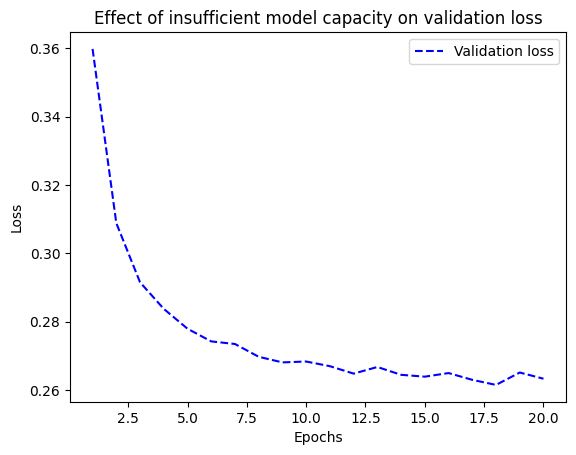

In [9]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [8]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8244 - loss: 0.6328 - val_accuracy: 0.9470 - val_loss: 0.1856
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9464 - loss: 0.1763 - val_accuracy: 0.9541 - val_loss: 0.1500
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9637 - loss: 0.1213 - val_accuracy: 0.9627 - val_loss: 0.1296
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9731 - loss: 0.0917 - val_accuracy: 0.9698 - val_loss: 0.1014
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9787 - loss: 0.0711 - val_accuracy: 0.9721 - val_loss: 0.0974
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9830 - loss: 0.0570 - val_accuracy: 0.9743 - val_loss: 0.0876
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9853 - loss: 0.0470 - val_accuracy: 0.9742 - val_loss: 0.0908
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9881 - loss: 0.0386 - val_accuracy: 0.

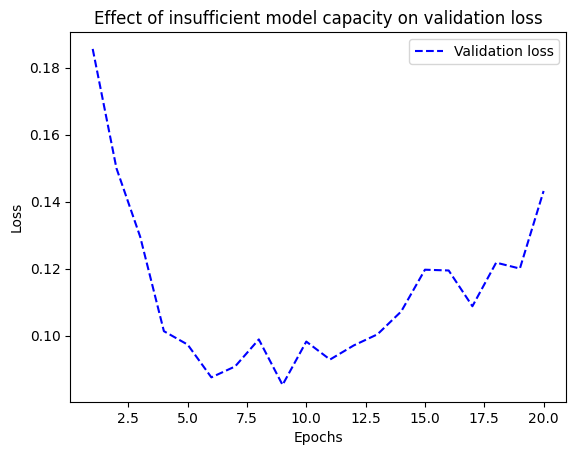

In [11]:
import matplotlib.pyplot as plt

# Access the validation loss from the history attribute of the History object
val_loss = history_large_model.history["val_loss"]

epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

## Improving generalization

### Regularizing your model - dealing with overfitting

#### Reducing the network's size - Decreasing model capacity

**Original model**

In [3]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)
import numpy as np # Import numpy

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.7024 - loss: 0.6119 - val_accuracy: 0.8496 - val_loss: 0.4333
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8846 - loss: 0.3728 - val_accuracy: 0.8771 - val_loss: 0.3362
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9091 - loss: 0.2750 - val_accuracy: 0.8856 - val_loss: 0.2958
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9315 - loss: 0.2160 - val_accuracy: 0.8903 - val_loss: 0.2809
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.9443 - loss: 0.1768 - val_accuracy: 0.8892 - val_loss: 0.2782
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9564 - loss: 0.1444 - val_accuracy: 0.8728 - val_loss: 0.3192
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9629 - loss: 0.1259 - val_accuracy: 0.8877 - val_loss: 0.2894
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.9706 - loss: 0.1063 - val_accuracy: 0.8849 - v

**Version of the model with lower capacity**

In [4]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.6997 - loss: 0.6396 - val_accuracy: 0.8504 - val_loss: 0.5149
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.8778 - loss: 0.4770 - val_accuracy: 0.8729 - val_loss: 0.4206
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.8988 - loss: 0.3777 - val_accuracy: 0.8817 - val_loss: 0.3599
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9124 - loss: 0.3107 - val_accuracy: 0.8862 - val_loss: 0.3220
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9231 - loss: 0.2612 - val_accuracy: 0.8881 - val_loss: 0.2982
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9308 - loss: 0.2284 - val_accuracy: 0.8913 - val_loss: 0.2846
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.9418 - loss: 0.1963 - val_accuracy: 0.8864 - val_loss: 0.2821
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.9459 - loss: 0.1768 - val_accuracy: 0.8895 - v

**Version of the model with higher capacity**

In [6]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 13s 392ms/step - accuracy: 0.6425 - loss: 0.6450 - val_accuracy: 0.8352 - val_loss: 0.3939
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 368ms/step - accuracy: 0.8735 - loss: 0.3225 - val_accuracy: 0.8734 - val_loss: 0.3010
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 339ms/step - accuracy: 0.9122 - loss: 0.2273 - val_accuracy: 0.8853 - val_loss: 0.2738
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 309ms/step - accuracy: 0.9309 - loss: 0.1833 - val_accuracy: 0.8878 - val_loss: 0.2781
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 361ms/step - accuracy: 0.9436 - loss: 0.1466 - val_accuracy: 0.8859 - val_loss: 0.2975
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 363ms/step - accuracy: 0.9653 - loss: 0.0968 - val_accuracy: 0.8842 - val_loss: 0.3179
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 403ms/step - accuracy: 0.9772 - loss: 0.0733 - val_accuracy: 0.8787 - val_loss: 0.3807
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 358ms/step - accuracy: 0.9870 - loss: 0.0472 - val_accu

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [7]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - accuracy: 0.6845 - loss: 0.7115 - val_accuracy: 0.8541 - val_loss: 0.5203
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.8809 - loss: 0.4667 - val_accuracy: 0.8757 - val_loss: 0.4194
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.9068 - loss: 0.3615 - val_accuracy: 0.8821 - val_loss: 0.3813
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9222 - loss: 0.3163 - val_accuracy: 0.8887 - val_loss: 0.3605
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9332 - loss: 0.2845 - val_accuracy: 0.8867 - val_loss: 0.3585
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9400 - loss: 0.2640 - val_accuracy: 0.8782 - val_loss: 0.3674
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9421 - loss: 0.2561 - val_accuracy: 0.8782 - val_loss: 0.3727
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9469 - loss: 0.2460 - val_accuracy: 0.8762 - v

0.002 means that to every weight in that layer we add 0.002 * weight ** 2

this penalty is only added during training time -> loss during training will be higher than during testing

**Different weight regularizers available in Keras**

In [ ]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [8]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.5842 - loss: 0.6657 - val_accuracy: 0.8333 - val_loss: 0.5303
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.7441 - loss: 0.5458 - val_accuracy: 0.8693 - val_loss: 0.4280
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8040 - loss: 0.4612 - val_accuracy: 0.8744 - val_loss: 0.3749
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8429 - loss: 0.4066 - val_accuracy: 0.8831 - val_loss: 0.3303
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.8759 - loss: 0.3568 - val_accuracy: 0.8856 - val_loss: 0.3044
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.8982 - loss: 0.3146 - val_accuracy: 0.8816 - val_loss: 0.2927
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9104 - loss: 0.2801 - val_accuracy: 0.8882 - val_loss: 0.2985
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9252 - loss: 0.2476 - val_accuracy: 0.8879 - v

Dropout(0.5) means:
* 50% of the neurons in the previous layer are randomly dropped during training.

* It’s applied after the Dense layer it follows, but it affects that layer.